In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq_full-wt')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 10,269
training + validation N: 40,249


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,2,0,0,0,0,0,0,0,0,0,AATTGATGTCCGGTAGCTCACTCATTAGGCAGCCAAGGTTTTAGAC...
1,training,0,0,0,1,0,0,0,0,0,0,AATTCATGTGAGTTATGTCTCTCATTAGGCACCCCAGGCTTGAGAT...
2,training,1,0,0,0,0,0,0,0,0,0,AATTAATGTGAGTTAGCTCACTCATTGGACACCCCAGGCTTTACAC...
3,training,0,1,0,0,0,0,0,0,0,0,ACTTAATAAAAGTCAGCTCACTCATTAATCACCCCACGCTCTACAT...
4,training,0,0,0,0,0,3,0,0,0,0,AATTAATGTGAGTTATCTAACTCATTAGGCACCCCAGGCTTTACAC...
5,training,0,0,0,0,0,0,0,0,1,0,AATTAATGTGAGTTAGCTCACTCATTAGGCCCCCAAGTCTTTACAC...
6,training,0,0,0,0,0,0,0,0,0,2,AATTAGTGTGAGTTGCCTCACACATTAGGCACGCCAGGCTTTACAC...
7,training,0,0,0,0,0,0,0,0,1,0,TATTAATTTGACTTAGCTCACTGATTCGGTACCCTAAGCTTTATAC...
8,training,0,1,0,0,0,0,0,0,0,0,AATTAATGTGAGGTACTTCATTTATGAGGCACCCCAGGCTTTACTC...
9,training,0,1,0,0,0,0,0,0,0,0,AATTAATCTGAGTTATTTTACTCATAAGGCACCCCAGGATTTACAC...


In [4]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=75, Y=10


In [5]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='MPA',
                     L=L,
                     Y=Y,
                     alphabet='dna',
                     gpmap_type='additive',
                     mpa_hidden_nodes=100)

# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.005,
          epochs=1000,
          batch_size=500,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=True)

# Save model
model.save('sortseq_full-wt_mpa_additive')

N = 40,249 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 0.602 sec.
 
LSMR            Least-squares solution of  Ax = b

The matrix A has    30306 rows  and      300 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =      300

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  9.215e+02  1.040e+06   1.0e+00  1.2e+00
     1  6.59954e-02  4.959e+02  1.579e+04   5.4e-01  2.4e-02  1.3e+03  1.0e+00
     2 -3.19065e-02  4.292e+02  4.147e+03   4.7e-01  7.2e-03  1.3e+03  2.1e+01
     3 -2.76251e-02  4.187e+02  2.141e+03   4.5e-01  3.8e-03  1.3e+03  3.1e+01
     4 -1.47948e-02  4.150e+02  8.095e+02   4.5e-01  1.5e-03  1.3e+03  3.1e+01
     5 -1.48415e-02  4.150e+02  8.062e+02   4.5e-01  1.4e-03  1.3e+03  2.9e+01
     6 -2.06047e-02  4.147e+02  3.500e+02   4.5e-01  4.5e-04  1.9e+03  2.9e+01
     7 -2.35410e-02  4.146e+02  1.4

Epoch 46/1000
61/61 [==============================] - 0s 4ms/step - loss: 1252.1089 - I_var: 0.6490 - val_loss: 1267.4218 - val_I_var: 0.6450
Epoch 47/1000
61/61 [==============================] - 0s 4ms/step - loss: 1255.5869 - I_var: 0.6423 - val_loss: 1276.7429 - val_I_var: 0.6246
Epoch 48/1000
61/61 [==============================] - 0s 4ms/step - loss: 1255.5040 - I_var: 0.6421 - val_loss: 1266.3455 - val_I_var: 0.6468
Epoch 49/1000
61/61 [==============================] - 0s 4ms/step - loss: 1251.3127 - I_var: 0.6516 - val_loss: 1268.7919 - val_I_var: 0.6418
Epoch 50/1000
61/61 [==============================] - 0s 5ms/step - loss: 1253.1196 - I_var: 0.6479 - val_loss: 1266.0643 - val_I_var: 0.6476
Epoch 51/1000
61/61 [==============================] - 0s 4ms/step - loss: 1252.4679 - I_var: 0.6488 - val_loss: 1271.4677 - val_I_var: 0.6358
Epoch 52/1000
61/61 [==============================] - 0s 5ms/step - loss: 1252.6577 - I_var: 0.6487 - val_loss: 1267.6514 - val_I_var: 0.6440

In [6]:
# Load model
model = mavenn.load('sortseq_full-wt_mpa_additive')

Model loaded from these files:
	sortseq_full-wt_mpa_additive.pickle
	sortseq_full-wt_mpa_additive.h5


On test data:
I_var_test: 0.632 +- 0.009 bits
I_pred_test: 0.780 +- 0.011 bits


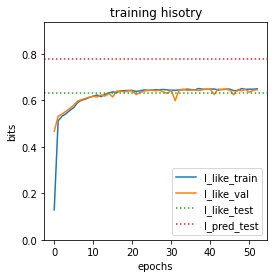

In [7]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_varlihood(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

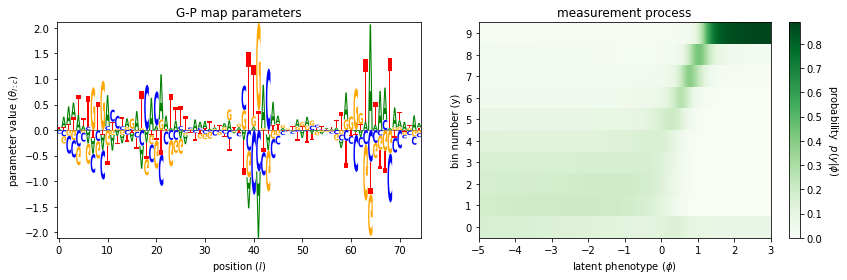

In [13]:
# Get G-P map parameters in matrix form
theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,2,figsize=[12,4])

# Left panel: draw logo using logomaker
ax = axs[0]
logo = logomaker.Logo(theta['logomaker_df'], ax=ax)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

# Right panel: draw measurement process as heatmap
ax = axs[1]
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_g-p_map_mpa_visualization.png')
plt.show()

In [9]:
# Test simulate_data
sim_df = model.simulate_dataset(N=len(data_df))
sim_df.head()

,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,1.494430,0,0,0,0,0,0,0,0,0,1,ACTTAATGTGAGTAACTTCACTCGTTACGCACCACAGGCTTGACAC...
1,training,-0.795140,0,0,0,0,1,0,0,0,0,0,AATTAATTTGAGTAAGCTCATTCATGAGCCACCCCAGGCTTTACAC...
2,training,0.936277,1,0,0,0,0,0,0,0,0,0,AATTAATTTGAGTTAGCTCACACATTAGGCACCCCAGGCTTTCCAA...
3,training,0.632827,0,0,0,0,0,0,1,0,0,0,AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACTC...
4,test,0.809088,0,0,0,0,0,0,0,0,1,0,AAGAAATGTGAGCTAGCTAACTCGATAGGCACCCCAGGCTTTACAC...


In [10]:
# Separate test from data_df
ix_test = (sim_df['set']=='test')
sim_test_df = sim_df[ix_test].reset_index(drop=True)
print(f'test N: {len(sim_test_df):,}')

# Remove test data from data_df
sim_df = sim_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(sim_df):,}')
sim_df.head(10)

test N: 7,924
training + validation N: 32,325


,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,1.494430,0,0,0,0,0,0,0,0,0,1,ACTTAATGTGAGTAACTTCACTCGTTACGCACCACAGGCTTGACAC...
1,training,-0.795140,0,0,0,0,1,0,0,0,0,0,AATTAATTTGAGTAAGCTCATTCATGAGCCACCCCAGGCTTTACAC...
2,training,0.936277,1,0,0,0,0,0,0,0,0,0,AATTAATTTGAGTTAGCTCACACATTAGGCACCCCAGGCTTTCCAA...
3,training,0.632827,0,0,0,0,0,0,1,0,0,0,AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACTC...
4,training,-1.417872,0,0,0,1,0,0,0,0,0,0,GATTTATTTGAGGTAGCTAACTCATTAGGCAGCACAGTCGTTATAC...
5,validation,-1.199878,0,0,1,0,0,0,0,0,0,0,CAATAATGAGATTTAGCTCACTCATTAGGGACGCCTAGCATTACAC...
6,validation,0.313576,0,0,0,1,0,0,0,0,0,0,AATTCATGTGAGTTAGCTCACTTATTAGGCACTGCAGGCTTTGCGC...
7,validation,0.050626,0,0,0,0,0,1,0,0,0,0,AATTAATGTGTGTTAGTTCTCTCATTAGTCACCCCAGGGTTTACAC...
8,training,-0.464640,0,0,0,1,0,0,0,0,0,0,AATTATTGTGACTTAGCTAACTCATTAGGAACCCCAGGTTTTAAAC...
9,training,-0.209130,0,0,0,1,0,0,0,0,0,0,AATTAATGGGAGTTAGCTAACTCAGTAGGCTCCCCAGGCTTTACAC...


In [11]:
# Define model
sim_model = mavenn.Model(regression_type='MPA',
                       L=L,
                       Y=Y,
                       alphabet='dna',
                       gpmap_type='additive',
                       mpa_hidden_nodes=100)

# Where is ct_n?
sim_model.set_data(x=sim_df['x'],
                   y=sim_df[y_cols])

# Fit model to data
sim_model.fit(learning_rate=.005,
              epochs=1000,
              batch_size=500,
              early_stopping=True,
              early_stopping_patience=10,
              linear_initialization=True)

N = 32,325 observations set as training data.
Using 20.2% for validation.
Data shuffled.
Time to set data: 0.512 sec.
 
LSMR            Least-squares solution of  Ax = b

The matrix A has    25811 rows  and      300 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =      300

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  8.420e+02  8.738e+05   1.0e+00  1.2e+00
     1  6.48807e-02  4.575e+02  1.266e+04   5.4e-01  2.2e-02  1.2e+03  1.0e+00
     2 -2.06290e-02  4.021e+02  3.480e+03   4.8e-01  7.0e-03  1.2e+03  2.1e+01
     3  1.23710e-02  3.931e+02  1.856e+03   4.7e-01  3.8e-03  1.2e+03  3.1e+01
     4 -6.82705e-03  3.895e+02  6.912e+02   4.6e-01  1.4e-03  1.2e+03  3.1e+01
     5 -6.79623e-03  3.895e+02  6.866e+02   4.6e-01  1.4e-03  1.2e+03  2.9e+01
     6 -4.83484e-03  3.892e+02  3.175e+02   4.6e-01  4.7e-04  1.8e+03  2.9e+01
     7 -2.19499e-03  3.891e+02  1.2

52/52 [==============================] - 0s 5ms/step - loss: 949.6749 - I_var: 0.6033 - val_loss: 957.7473 - val_I_var: 0.5795
Epoch 47/1000
52/52 [==============================] - 0s 5ms/step - loss: 950.8870 - I_var: 0.5993 - val_loss: 958.9182 - val_I_var: 0.5870
Epoch 48/1000
52/52 [==============================] - 0s 4ms/step - loss: 950.9816 - I_var: 0.5989 - val_loss: 955.1745 - val_I_var: 0.5893
Epoch 49/1000
52/52 [==============================] - 0s 4ms/step - loss: 949.3917 - I_var: 0.6023 - val_loss: 957.3923 - val_I_var: 0.5845
Epoch 50/1000
52/52 [==============================] - 0s 5ms/step - loss: 949.3275 - I_var: 0.6036 - val_loss: 958.5560 - val_I_var: 0.5756
Epoch 51/1000
52/52 [==============================] - 0s 5ms/step - loss: 949.9030 - I_var: 0.6008 - val_loss: 955.0453 - val_I_var: 0.5894
Epoch 52/1000
52/52 [==============================] - 0s 4ms/step - loss: 949.9574 - I_var: 0.6002 - val_loss: 957.0731 - val_I_var: 0.5803
Epoch 53/1000
52/52 [======

On test data:
I_intr_like: 0.606 +- 0.012 bits
I_intr_pred: 0.591 +- 0.014 bits
I_var_test: 0.578 +- 0.011 bits
I_pred_test: 0.595 +- 0.013 bits


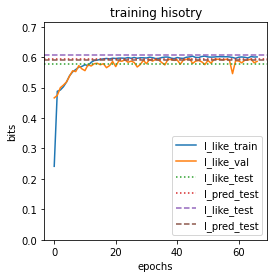

In [12]:
# Show training history
print('On test data:')
x_test = sim_test_df['x'].values
y_test = sim_test_df[y_cols].values

# Compute the intrinsic information using the true model
I_intr_like, dI_intr_like =  model.I_varlihood(x=x_test, y=y_test)
print(f'I_intr_like: {I_intr_like:.3f} +- {dI_intr_like:.3f} bits') 

I_intr_pred, dI_intr_pred =  model.I_predictive(x=x_test, y=y_test)
print(f'I_intr_pred: {I_intr_pred:.3f} +- {dI_intr_pred:.3f} bits') 

# Compute likelihood information
I_var, dI_var =  sim_model.I_varlihood(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = sim_model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = sim_model.history['I_var']
val_I_var_hist = sim_model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.axhline(I_intr_like, color='C4', linestyle='--', label='I_var_test')
ax.axhline(I_intr_pred, color='C5', linestyle='--', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);